In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
sns.set_style("whitegrid")

In [3]:
ames = pd.read_csv("data/train.csv")

### Nominal and Ordinal Variable Lists

In [5]:
ames.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Create list of nominal features, tally with univariate analysis notes and update it.

In [23]:
nominal_list = list(ames.select_dtypes(include='object').columns)
nominal_list.extend(['MSSubClass','MoSold','YrSold'])
nominal_fp = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','PoolQC','Fence']
nominal_list = [x for x in nominal_list if x not in nominal_fp]

ordinal_list = nominal_fp.copy()
ordinal_list.extend(['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars'])

In [24]:
len(ordinal_list), len(nominal_list)

(20, 36)

---

### ANOVA Function

In [25]:
def anova_result(feat, target, df):
    df_lm = ols(target + ' ~ ' + feat, data=df).fit()
    print(feat+":")
    print(sm.stats.anova_lm(df_lm, typ=2))

### Check ANOVA to determine if a nominal feature needs to be dropped

In [30]:
# list of nominal features need to be checked further (boxplot), before adding into drop list
nominal_check_list = []
# drop list for nominal features
nominal_drop = []

In [29]:
for feature in nominal_list[:10]:
    anova_result(feature,'SalePrice',ames)

MSZoning:
                sum_sq      df          F        PR(>F)
MSZoning  9.904000e+11     4.0  43.840282  8.817634e-35
Residual  8.217511e+12  1455.0        NaN           NaN
Street:
                sum_sq      df        F    PR(>F)
Street    1.550534e+10     1.0  2.45929  0.117049
Residual  9.192406e+12  1458.0      NaN       NaN
Alley:
                sum_sq    df         F        PR(>F)
Alley     4.721637e+10   1.0  35.56206  4.899826e-08
Residual  1.181669e+11  89.0       NaN           NaN
LotShape:
                sum_sq      df          F        PR(>F)
LotShape  7.032607e+11     3.0  40.132852  6.447524e-25
Residual  8.504651e+12  1456.0        NaN           NaN
LandContour:
                   sum_sq      df          F        PR(>F)
LandContour  2.375097e+11     3.0  12.850188  2.742217e-08
Residual     8.970402e+12  1456.0        NaN           NaN
Utilities:
                 sum_sq      df         F    PR(>F)
Utilities  1.886693e+09     1.0  0.298804  0.584717
Residual   9.20

In [31]:
nominal_check_list.extend(['Street','Utilities','LandSlope'])

In [32]:
for feature in nominal_list[10:20]:
    anova_result(feature,'SalePrice',ames)

Condition2:
                  sum_sq      df         F    PR(>F)
Condition2  9.115059e+10     7.0  2.073899  0.043426
Residual    9.116761e+12  1452.0       NaN       NaN
BldgType:
                sum_sq      df          F        PR(>F)
BldgType  3.179863e+11     4.0  13.011077  2.056736e-10
Residual  8.889925e+12  1455.0        NaN           NaN
HouseStyle:
                  sum_sq      df          F        PR(>F)
HouseStyle  7.947590e+11     7.0  19.595001  3.376777e-25
Residual    8.413152e+12  1452.0        NaN           NaN
RoofStyle:
                 sum_sq      df          F        PR(>F)
RoofStyle  5.312655e+11     5.0  17.805497  3.653523e-17
Residual   8.676646e+12  1454.0        NaN           NaN
RoofMatl:
                sum_sq      df         F        PR(>F)
RoofMatl  2.892493e+11     7.0  6.727305  7.231445e-08
Residual  8.918662e+12  1452.0       NaN           NaN
Exterior1st:
                   sum_sq      df          F        PR(>F)
Exterior1st  1.406721e+12    14.0  1

In [33]:
for feature in nominal_list[20:30]:
    anova_result(feature,'SalePrice',ames)

Foundation:
                  sum_sq      df           F        PR(>F)
Foundation  2.360618e+12     5.0  100.253851  5.791895e-91
Residual    6.847294e+12  1454.0         NaN           NaN
Heating:
                sum_sq      df         F    PR(>F)
Heating   1.329359e+11     5.0  4.259819  0.000753
Residual  9.074975e+12  1454.0       NaN       NaN
CentralAir:
                  sum_sq      df          F        PR(>F)
CentralAir  5.816255e+11     1.0  98.305344  1.809506e-22
Residual    8.626286e+12  1458.0        NaN           NaN
Electrical:
                  sum_sq      df          F        PR(>F)
Electrical  5.494534e+11     4.0  23.067673  1.663249e-18
Residual    8.658278e+12  1454.0        NaN           NaN
Functional:
                  sum_sq      df         F    PR(>F)
Functional  1.517499e+11     6.0  4.057875  0.000484
Residual    9.056161e+12  1453.0       NaN       NaN
GarageType:
                  sum_sq      df          F        PR(>F)
GarageType  1.778186e+12     5.0  71

In [34]:
for feature in nominal_list[30:]:
    anova_result(feature,'SalePrice',ames)

MiscFeature:
                   sum_sq    df         F    PR(>F)
MiscFeature  1.705983e+10   3.0  2.157324  0.104728
Residual     1.317978e+11  50.0       NaN       NaN
SaleType:
                sum_sq      df          F        PR(>F)
SaleType  1.264131e+12     8.0  28.863054  5.039767e-42
Residual  7.943780e+12  1451.0        NaN           NaN
SaleCondition:
                     sum_sq      df          F        PR(>F)
SaleCondition  1.247649e+12     5.0  45.578428  7.988268e-44
Residual       7.960263e+12  1454.0        NaN           NaN
MSSubClass:
                  sum_sq      df          F    PR(>F)
MSSubClass  6.541130e+10     1.0  10.431466  0.001266
Residual    9.142500e+12  1458.0        NaN       NaN
MoSold:
                sum_sq      df         F    PR(>F)
MoSold    1.985183e+10     1.0  3.150172  0.076128
Residual  9.188060e+12  1458.0       NaN       NaN
YrSold:
                sum_sq      df         F    PR(>F)
YrSold    7.702565e+09     1.0  1.220661  0.269413
Residual  

In [35]:
nominal_check_list.extend(['MiscFeature','MoSold','YrSold'])

**Examine nominal_check_list to filter features into nominal_drop_list**

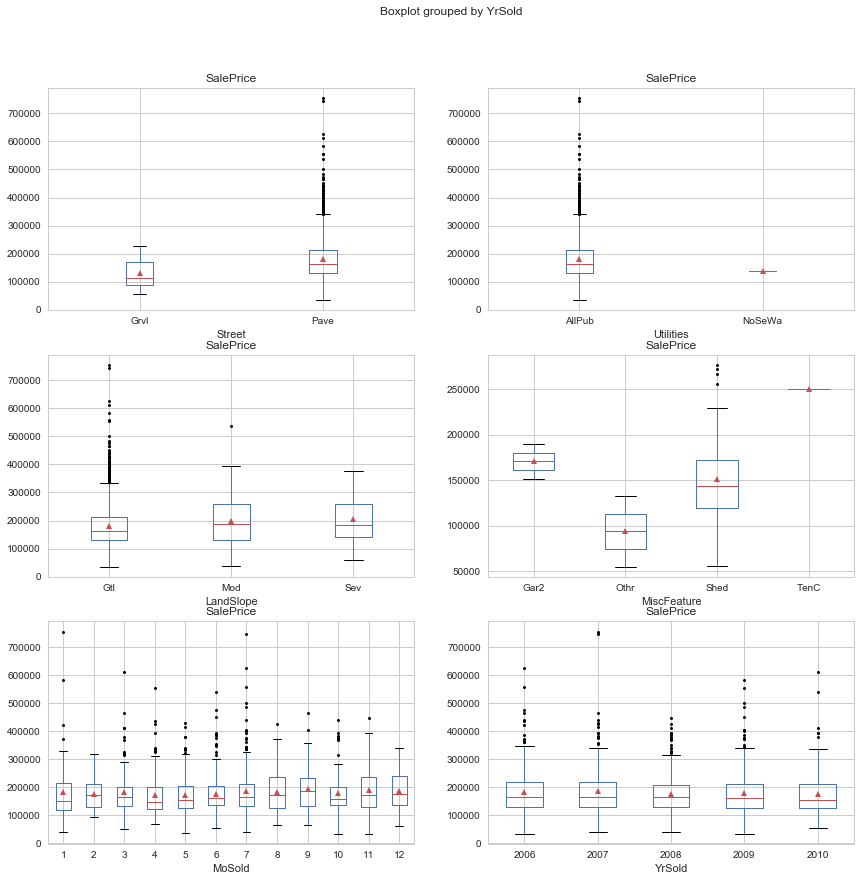

In [36]:
fig1, ax1 = plt.subplots(nrows=3, ncols=2, figsize=(14,14))
for i in range(0,6):
    ames.boxplot(column='SalePrice',by=nominal_check_list[i],sym='k.', ax=ax1[i//2,i%2], showmeans=True)

**Street**: extremely non-uniform distribution. And not much difference of SalePrice between categories. Drop.  
**Utilities**: Strong ANOVA value. all except one observations belong to just one category. Drop.  
**LandSlope**: extremely non-uniform distribution. All outliers belong to predominant category. Drop.

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


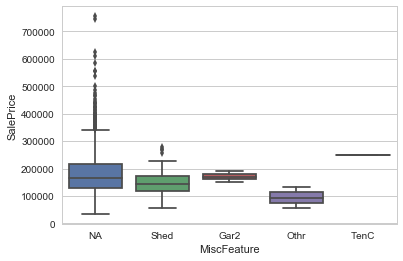

In [38]:
sns.boxplot(ames['MiscFeature'].apply(lambda x: 'NA' if pd.isnull(x) else x), ames['SalePrice'])

**MiscFeature**: most values are missing = "no misc feature". adding this as a category also shows no difference in means. Drop.  
**MoSold**: Drop.  
**YrSold**: Drop.

In [39]:
nominal_drop = nominal_check_list.copy()